[32.78405518920606, 32.77721359060754, 32.77037199200902, 32.7635303934105, 32.75668879481198, 32.74984719621346, 32.74300559761494, 32.73616399901642, 32.72932240041791, 32.72248080181939, 32.71563920322087, 32.70879760462235, 32.70195600602383, 32.69511440742531, 32.68827280882679, 32.68143121022827, 32.67458961162975, 32.66774801303123, 32.66090641443271, 32.65406481583419, 32.64722321723567, 32.64038161863715, 32.63354002003863, 32.62669842144012, 32.6198568228416, 32.61301522424308, 32.60617362564456, 32.59933202704604, 32.59249042844752, 32.585648829849, 32.57880723125048, 32.57196563265196, 32.56512403405344, 32.55828243545492, 32.5514408368564, 32.54459923825788, 32.53775763965936, 32.53091604106084, 32.52407444246232, 32.51723284386381, 32.51039124526529, 32.50354964666677, 32.49670804806825, 32.48986644946973, 32.48302485087121, 32.47618325227269, 32.46934165367417, 32.46250005507565, 32.45565845647713, 32.44881685787861, 32.44197525928009, 32.43513366068157, 32.4282920620830

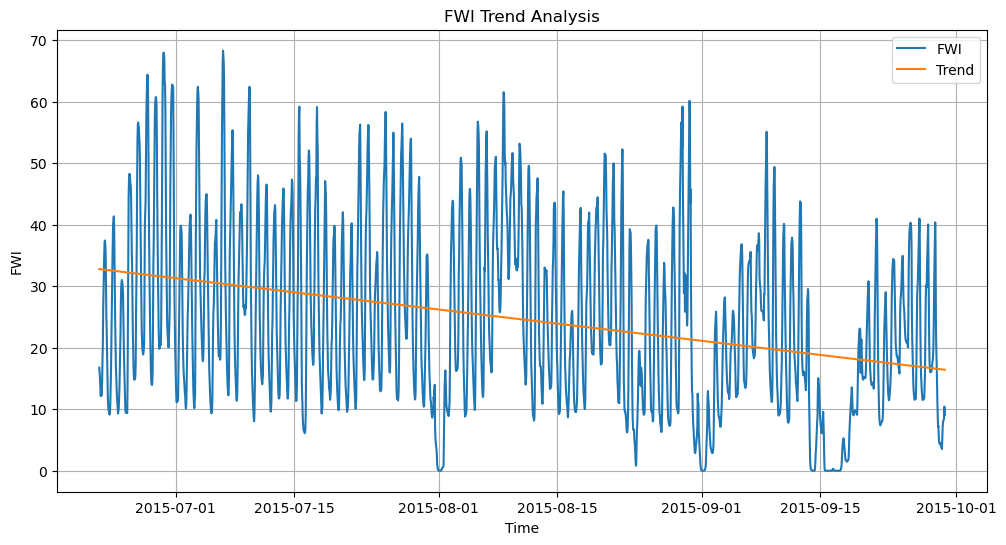

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

year = 2015

def calculate_trend(coefficients, x):
    return coefficients[0] * x + coefficients[1]

data = pd.read_csv('Samples/2015/2015byHourFWIXFFMCFireHour.csv', parse_dates=['hourly.time'])

#.tail((24*3)+1)

data['hourly.time'] = pd.to_datetime(data['hourly.time'])
temperature = data['fwix'].values.flatten()
time = data['hourly.time'].values.flatten()

degree = 1
indices = np.arange(len(temperature))
coefficients = np.polyfit(indices, temperature, degree)

trend_values = [calculate_trend(coefficients, x) for x in indices]

print(trend_values)
print(indices)

plt.figure(figsize=(12, 6))
plt.plot(time, temperature, label='FWI')
plt.plot(time, trend_values, label='Trend')
plt.xlabel('Time')
plt.ylabel('FWI')
plt.title('FWI Trend Analysis')
plt.legend()
plt.grid()
plt.show()

#plt.savefig(f'{year}_3days_fwi_trend_analysis.png')

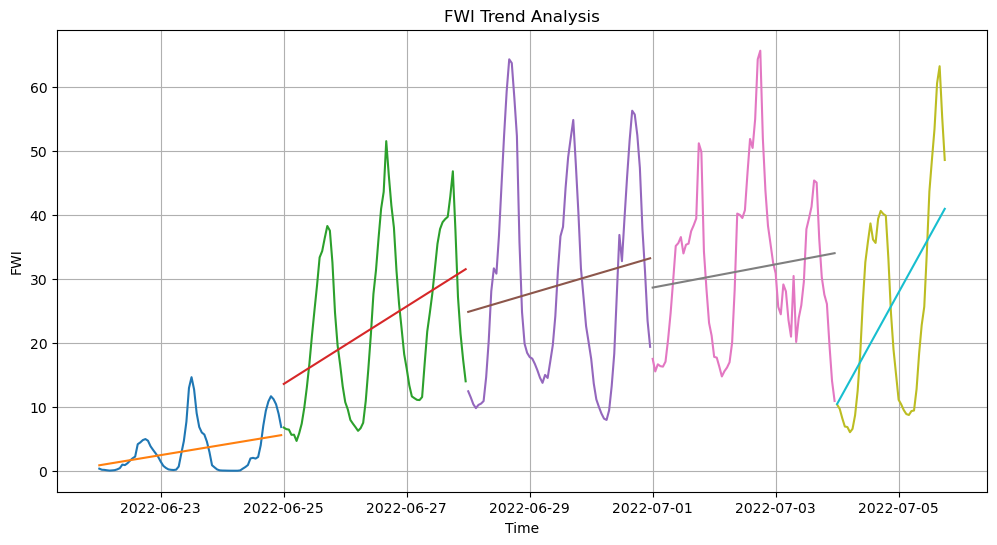

<Figure size 640x480 with 0 Axes>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

year = 2022

def calculate_trend(coefficients, x):
    return coefficients[0] * x + coefficients[1]

data = pd.read_csv('Samples/2015/2022byHourFWIXFFMCFireHour.csv', parse_dates=['hourly.time'])

plt.figure(figsize=(12, 6))

block_size = 24 * 3

for start_index in range(0, len(data), block_size):
    end_index = start_index + block_size
    block_data = data.iloc[start_index:end_index]
    temperature = block_data['fwix'].values.flatten()
    time = block_data['hourly.time'].values.flatten()

    degree = 1
    indices = np.arange(start_index, start_index + len(block_data))
    coefficients = np.polyfit(indices, temperature, degree)

    trend_values = [calculate_trend(coefficients, x) for x in indices]

    plt.plot(time, temperature)
    plt.plot(time, trend_values)

plt.xlabel('Time')
plt.ylabel('FWI')
plt.title('FWI Trend Analysis')
plt.grid()
plt.show()

plt.savefig(f'{year}_BLOCK3days_fwi_trend_analysis.png')

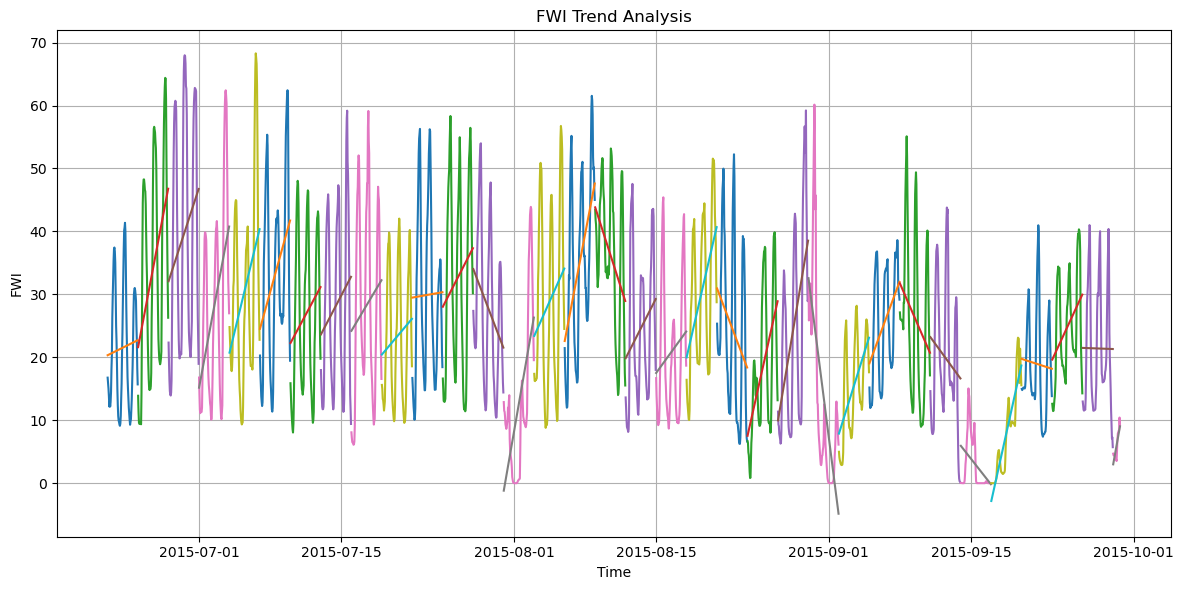

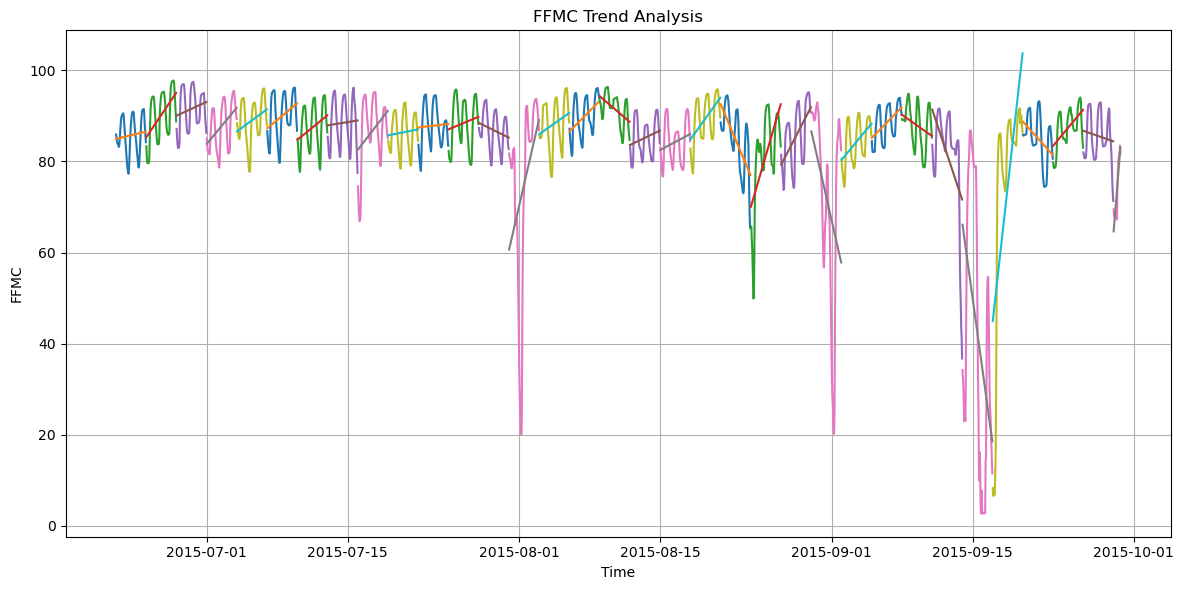

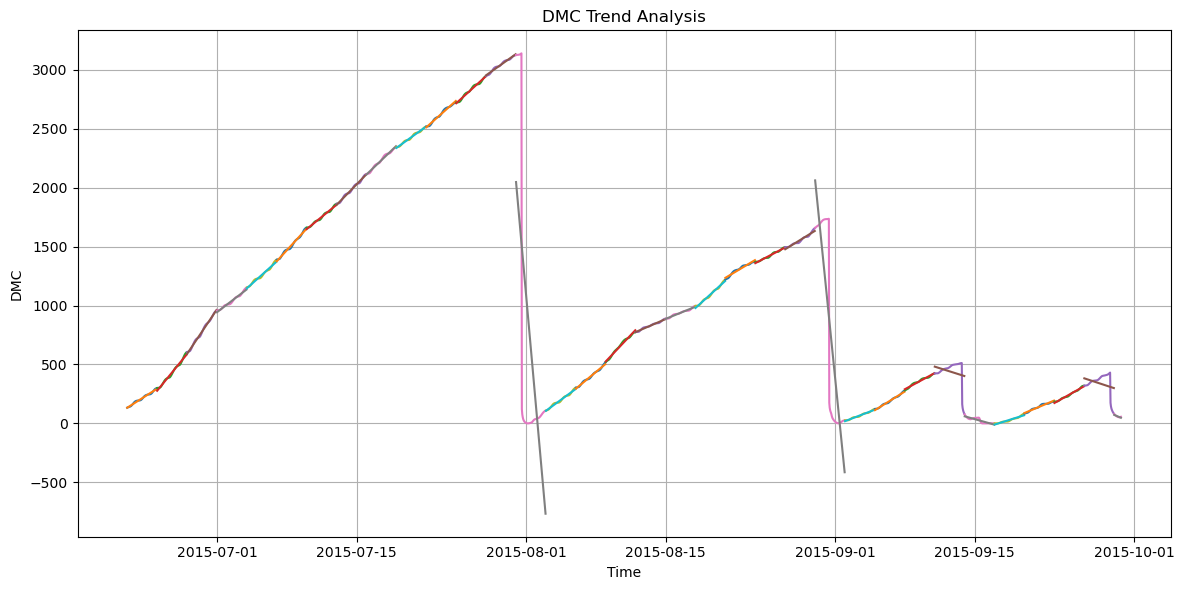

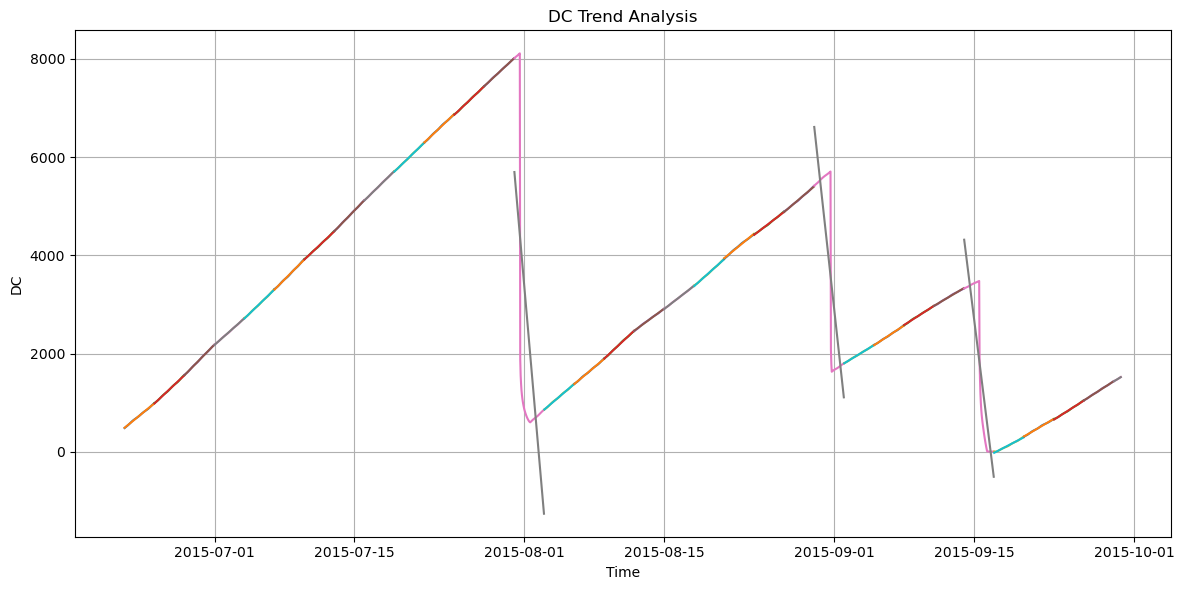

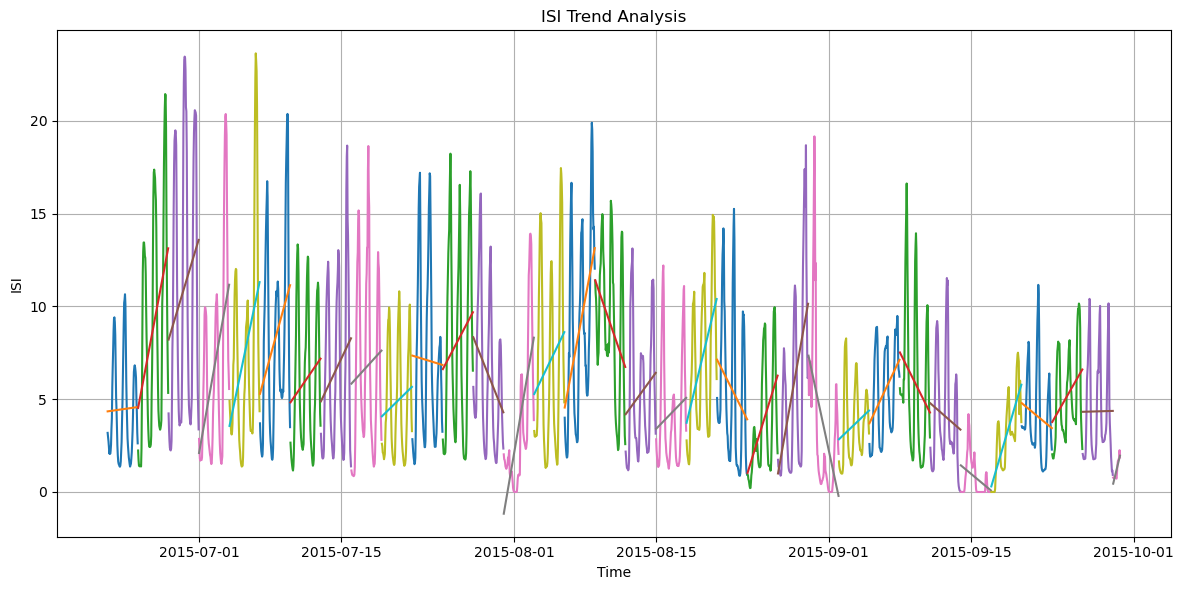

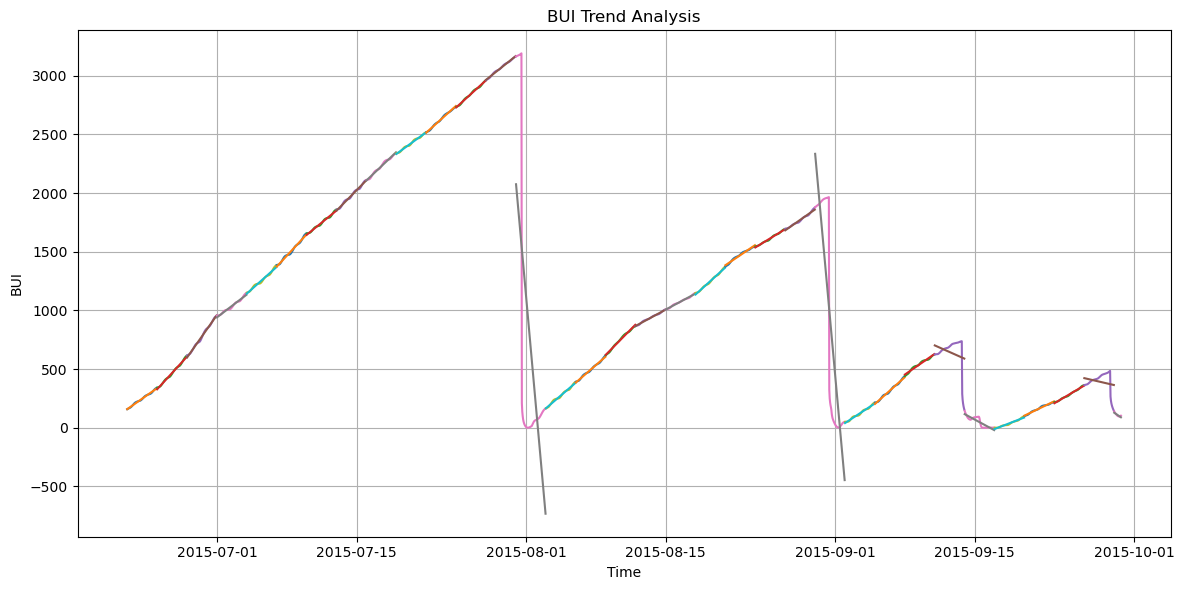

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

year = 2015

def calculate_trend(coefficients, x):
    return coefficients[0] * x + coefficients[1]

data = pd.read_csv('Samples/2015/2015byHourFWIXFFMCFireHour.csv', parse_dates=['hourly.time'])


#.tail((24*15)+1)


vars = ['fwix','ffmc','dmc','dc','isi','bui']

for i in vars:
    if (i == 'fwix'):
        nvar = 'FWI'
    else:
        nvar = i


    plt.figure(figsize=(12, 6))

    block_size = 24 * 3

    for start_index in range(0, len(data), block_size):
        end_index = start_index + block_size
        block_data = data.iloc[start_index:end_index]
        temperature = block_data[f'{i}'].values.flatten()
        time = block_data['hourly.time'].values.flatten()

        degree = 1
        indices = np.arange(start_index, start_index + len(block_data))
        coefficients = np.polyfit(indices, temperature, degree)

        trend_values = [calculate_trend(coefficients, x) for x in indices]

        plt.plot(time, temperature, linestyle='-')
        plt.plot(time, trend_values)

    plt.xlabel('Time')
    plt.ylabel(f'{nvar.upper()}')
    plt.title(f'{nvar.upper()} Trend Analysis')
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'{year}_BLOCK3days_{nvar}_trend_analysis.png')
    plt.show()